# Ebay Car Sales Analysis
 - Understanding trend of data about car sales in Ebay

### The analysis outline
1. Load the data using pandas
    - You will notice that the UTF_8 will not decode this da
2. Review the overview of the your data set to know it and write one paragraph of the observation.
3. Convert the column dateCrawled into a Datetime object
4. Convert the price column value into interger to facilitate further analysis
5. Remove 'KM' from the odometer column
6. Rename the column names to give them more meaningful names and readable names
7. Inspect the type of data each column is having
8. Inspect the numerical columns to investigate their statistical characteristics
9. Investigation I: Price vs Odometer



In [1]:
#import the libraries neede

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import *
import numpy as np
import time 

#### STEP 1: Loading data into pandas

In [2]:
sales_auto = pd.read_csv('autos.csv',encoding = "latin-1")


#### STEP 2 : Review the the dataset to get an overview

In [3]:
sales_auto

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


#### Quick overview of the dataset
 - There is a number of Dates that are being represented as strings, this will need to change
 - Price column which is containing valueble information for the analysis is in contain the $ sign we will need to remove it to be able to perfom analysis.
 - Odometer column also will need to be changed to remove the KM word so that to allow the analysis

#### STEP 3: Lets change the dateCrawled  into a datetime object

In [4]:
#lets check what data type is the column DateCrawled
sales_auto['dateCrawled']

0        2016-03-26 17:47:46
1        2016-04-04 13:38:56
2        2016-03-26 18:57:24
3        2016-03-12 16:58:10
4        2016-04-01 14:38:50
                ...         
49995    2016-03-27 14:38:19
49996    2016-03-28 10:50:25
49997    2016-04-02 14:44:48
49998    2016-03-08 19:25:42
49999    2016-03-14 00:42:12
Name: dateCrawled, Length: 50000, dtype: object

In [5]:
#from the cell above we have seen that the column is not a datetime object so we are going to change
sales_auto['dateCrawled'] = pd.to_datetime(sales_auto['dateCrawled'])

#Lets just make sure that we have done the conversation well
sales_auto['dateCrawled']

0       2016-03-26 17:47:46
1       2016-04-04 13:38:56
2       2016-03-26 18:57:24
3       2016-03-12 16:58:10
4       2016-04-01 14:38:50
                ...        
49995   2016-03-27 14:38:19
49996   2016-03-28 10:50:25
49997   2016-04-02 14:44:48
49998   2016-03-08 19:25:42
49999   2016-03-14 00:42:12
Name: dateCrawled, Length: 50000, dtype: datetime64[ns]

#### STEP4: Convert the price column to interger and remove "$" and ","

In [6]:
#lets write a function which will take value in the column price and return the interger value

#define the function that takes one argument
#replace "$" and "," from the string that was passed as an argument
#convert the string into interger using int()
#Return the interger value


def convert_string_to_int(string):
    y = list(string)
    for i in range(len(y)):
        if y[i] == '$' or y[i]==',':
            y[i] = ''
    price = int("".join(y))
    return price

In [7]:
#unit testing the function above
assert convert_string_to_int('$78,000') == 78000
assert convert_string_to_int('$6,000') == 6000

In [8]:
#apply the function to the dataset
start = time.time()

sales_auto['price'] = sales_auto['price'].apply(convert_string_to_int)

end = time.time()
end-start

0.07882285118103027

#### STEP 5: Convert Odometer column to Interger and remove the "KM"

In [9]:
#lets make a function that will be used to remove the KM and convert the string to int

#define the function which takes one string argument
#using the access method drop the two last characters
#convert the string into int

def converting_odometer(string):
    string = string[:-2]
    string = string.replace(',','')
    return int(string)

In [10]:
type(converting_odometer('150,000km'))

int

In [11]:
#unit testing the function
assert converting_odometer('150,000km') == 150000
assert converting_odometer('70,000km') == 70000

In [12]:
#apply the function to the whole dataset
start = time.time()

sales_auto['odometer'] = sales_auto['odometer'].apply(converting_odometer)

end = time.time()

end -start

0.03594827651977539

#### STEP 6: Rename the columns to proper names that can be easily understood.

In [13]:
sales_auto.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_PS', 'model',
       'odometer_in_km', 'month_of_registration', 'fuel_type', 'brand',
       'not_repaired_damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen']


#### STEP 7: Inspect the type of data each column is having


In [14]:
sales_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled             50000 non-null datetime64[ns]
name                     50000 non-null object
seller                   50000 non-null object
offer_type               50000 non-null object
price                    50000 non-null int64
ab_test                  50000 non-null object
vehicle_type             44905 non-null object
year_of_registration     50000 non-null int64
gearbox                  47320 non-null object
power_PS                 50000 non-null int64
model                    47242 non-null object
odometer_in_km           50000 non-null int64
month_of_registration    50000 non-null int64
fuel_type                45518 non-null object
brand                    50000 non-null object
not_repaired_damage      40171 non-null object
date_created             50000 non-null object
nr_of_pictures           50000 non-null int64
postal_code              50000 non-null int

##### From the cell above:
 - There about 5000 rows with no Vehicle type values
 - There are about 2000 entries missing the gearbox detail
 - There are about 2000 entries missing the model detail
 - There are abour 5000 entries missing the fuel type detail
 - There are about 10,000 entries missing not_repaired_damage details
 
 This information will be usefull in the further analysis to be done.

#### STEP 8: Inspect the numerical columns to investigate the statistical characteristics

In [15]:
sales_auto.describe()

,price,year_of_registration,power_PS,odometer_in_km,month_of_registration,nr_of_pictures,postal_code
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,9.840044e+03,2005.073280,116.355920,125732.700000,5.723360,0.0,50813.627300
std,4.811044e+05,105.712813,209.216627,40042.211706,3.711984,0.0,25779.747957
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1.100000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30451.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49577.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71540.000000
max,1.000000e+08,9999.000000,17700.000000,150000.000000,12.000000,0.0,99998.000000


##### From above cell we can see several RED flags on the numberical columns
 - From the **year_of_registration** the low year is reported to be 1000, *This looks to be wrong and will spoil the analysis if it is left un intended*. this should be accounted for when we are looking at this data
 - There is interesting fact about the **price**, where there is a price of 0 - this is worthy investigation.
 - The minimum **power_PS** is 0 and this is questionable
 - The minimum **month_of_registration** is 0 this is also a red flag and should be invesigated

#### STEP 9: Investigate the relationship between the price of a car vs the distance it has covered.

In [16]:
#lets look at the price column where the price was zero
len(sales_auto[sales_auto['price'] == 0])

1421

##### from the cell above 
   - There are 1421 entries that have a price as 0 we will need to avoid them in our analysis

In [47]:
#we are going to include only small values for the price as there some lots of outliers that will skew the data
price_distance_auto = price_distance_auto[price_distance_auto['price'] < 200000]


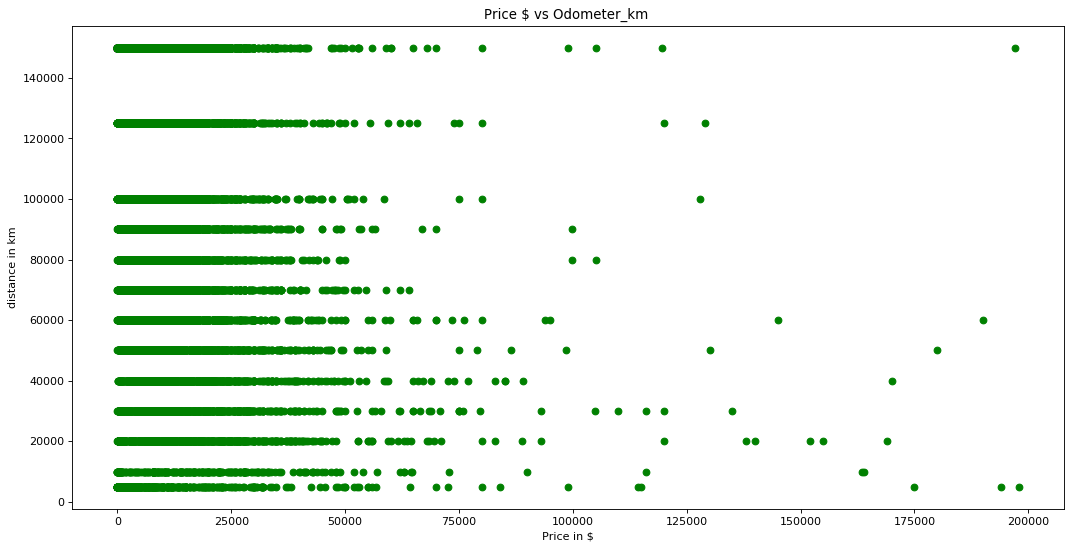

In [54]:
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(price_distance_auto['price'],price_distance_auto['odometer_in_km'], marker = 'o', color = 'g')
plt.title('Price $ vs Odometer_km ')
plt.xlabel('Price in $')
plt.ylabel('distance in km')
plt.show()

In [52]:
price_year_reg = sales_auto[(sales_auto['price']< 200000)&(sales_auto['year_of_registration'] <2020)]
price_year_reg = price_year_reg[price_year_reg['year_of_registration']>1990]

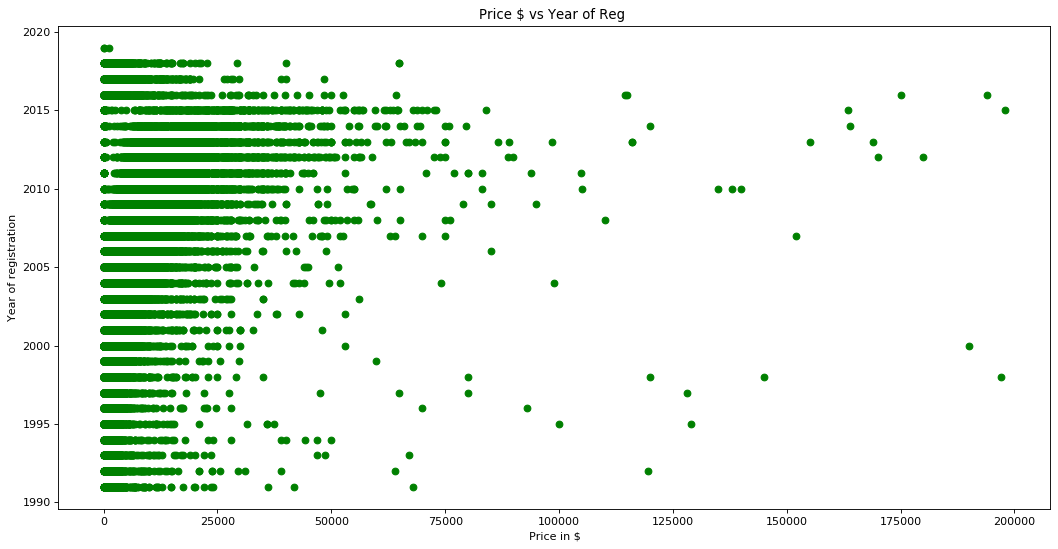

In [55]:
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(price_year_reg['price'],price_year_reg['year_of_registration'], marker = 'o', color = 'g')
plt.title('Price $ vs Year of Reg ')
plt.xlabel('Price in $')
plt.ylabel('Year of registration')
plt.show()

In [101]:
sales_auto['model'].fillna('Others',inplace=True)


In [110]:
list(sales_auto['gearbox'].unique())

['manuell', 'automatik', nan]

In [84]:
sales_auto.groupby('model')

In [117]:
#define the function which will take a dataset as input
    #make a list of which will contain the model names
    #create an empty dictionary
    #for model in models
        #asign the dictionary key and value
    #sort the dictionary
    #return the dictionary

def dataset_composition(dataset,column):
    models = list(sales_auto[column].unique())
    model_comp_dic = {}
    
    for model in models:
        model_comp_dic[model] = dataset[column][dataset[column]==model].count()
    
    dic_items = model_comp_dic.items()
    return sorted(dic_items,key=lambda x : x[1], reverse = True)    

In [118]:
start = time.time()
models_of_cars = dataset_composition(sales_auto,'model')
end = time.time()
end -start

0.6702086925506592

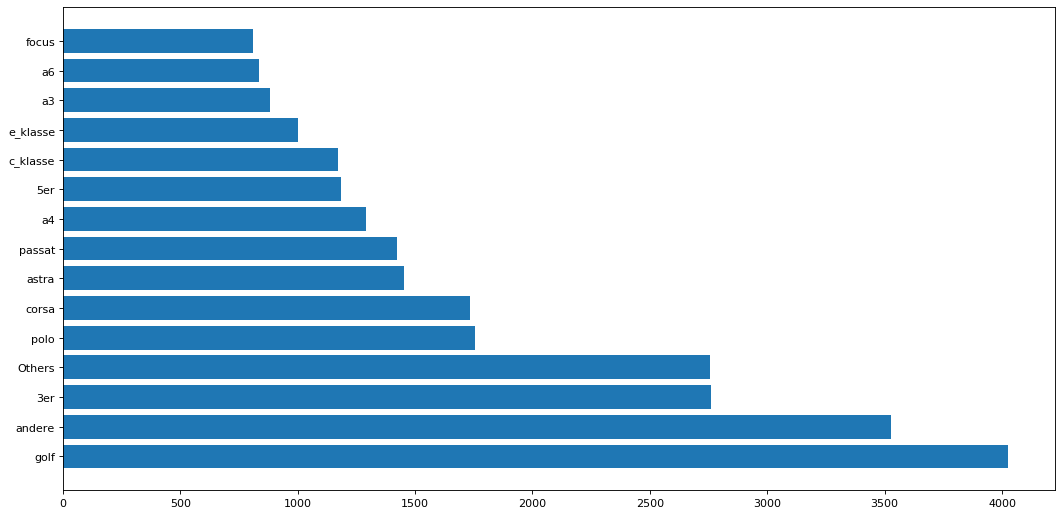

In [119]:
x, y = zip(*models_of_cars[:15]) # unpack a list of pairs into two tuples
plt.figure(figsize=(16, 8), dpi=80)
plt.barh(x,y)
plt.show()

In [120]:
start = time.time()
gearbox_type = dataset_composition(sales_auto,'gearbox')
end = time.time()
end - start

0.013963460922241211

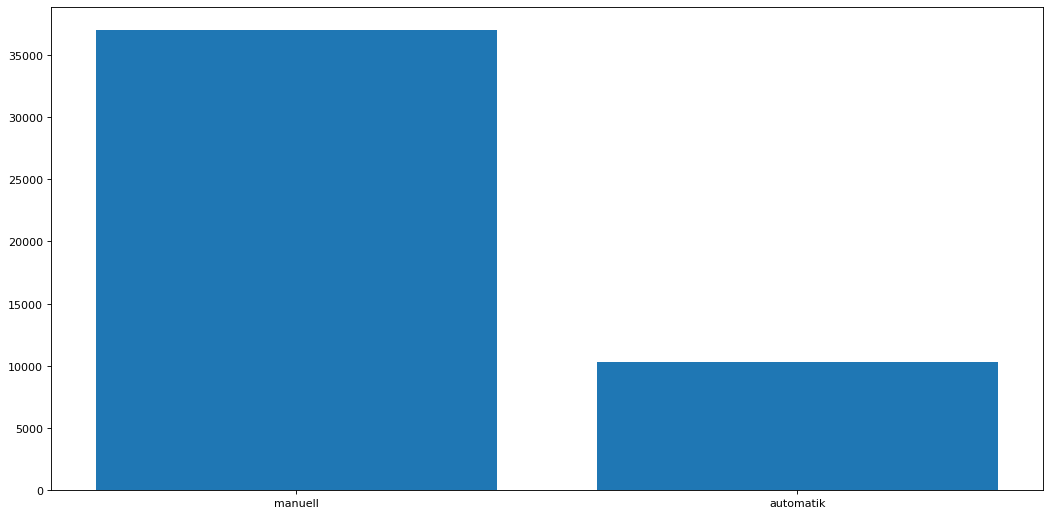

In [123]:
x, y = zip(*gearbox_type[:2]) # unpack a list of pairs into two tuples
plt.figure(figsize=(16, 8), dpi=80)
plt.bar(x,y)
plt.show()